# Project 3

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

## Purpose

I have two goals for you for this project:

1. Implement, backtest, describe, and *explain* an investing strategy of your choice in Python
2. Investigate industry returns; several students have come to me interested in "sector rotation strategies"

## Assignment {#sec-assignment}

***Use the 49 industry returns to build an investing strategy that maximizes the Sharpe ratio and/or total return.***
You may use any strategy, such as portfolio optimization, momentum, equal weights, or inverse volatility weights, among others.
You may use short weights of up to 30% of your portfolio, including borrowing at the risk-free rate (i.e., `RF` from the Fama-French factors).
***You may not use future returns to assemble your current portfolio.***
That is, for each month, use only past data to set portfolio weights, not future returns.

However, you may backtest your strategy on the full sample, even though this backtesting creates a bias.[^backtest]
To reduce the impact of this bias, I will backtest all groups on the same random five-year sample.

[^backtest]: To avoid this bias, I would give you anonymized data, you would automate your strategy into one function, and I would backtest your function output on a holdout sample.
This process would be beyond the scope of this course.


For my backtest, your notebook must create monthly portfolio returns.
Start these returns no later than five years into the sample to allow lookback periods for your strategy.
Your notebook must export these returns to a CSV file named `Group_XX.csv`, where `XX` is your two-digit group number (e.g., `Group_01.csv` for Group 01).
This CSV file must have only two columns:

1. `Date` with dates in the same format as the Fama-French files
2. `Group_XX` (e.g., `Group_01`) with your portfolio returns as decimals

Here is an example row in `Group_01.csv`: `Date,Group_01` with `1931-07,0.0025`.

:::{.callout-note}
On Friday, 4/11, I added a function to the end of this notebook that you can use export your data for the competition.
:::

I will pick a random five-year period to backtest your strategy and evaluate it based on its Sharpe ratio and total return.
The highest Sharpe ratio will earn 15 points, and the highest total return will earn 15 points.
Other groups get fewer points based on their Sharpe ratios and total returns relative to the top performers.
The other 170 points come from your calculations, visualizations, discussions, and deliverables.
See @sec-criteria and @tbl-grading-rubric for details.

Other important considerations:

1. Use only the provided CSV files for industry and factor returns
2. Write up to a three-page summary of your strategy, including:
    1. A description of your strategy
    2. An explanation of why your strategy might have the highest Sharpe ratio and/or total return
    3. Figures and tables to support your description and explanation
3. Title, label, and caption your figures and tables, referencing them in your summary

## Criteria {#sec-criteria}

@tbl-grading-rubric provides the project grading rubric.
The project is worth 200 points.
The peer reviews are worth 100 points, and students will receive their median score.
Almost all students earn perfect peer review scores, so I will factor that into project scores.
For example, a project score *without peer review scores* of $77.5\%$ converts to a project score *with perfect peer review scores* of $85\%$ because $\frac{0.775 \times 200 + 1.00 \times 100}{300} = 0.85 = 85\%$.

| Topic | Points |
|:------|:-------|
| Clarity, correctness, and completeness of calculations          |  50 |
| Clarity, correctness, and completeness of visualizations        |  50 |
| Clarity, correctness, and completeness of discussions           |  50 |
| Highest Sharpe ratio in the five-year sample that I select      |  15 |
| Highest total return in the five-year sample that I select      |  15 |
| Correctness of submission according to the deliverables section |  20 |
| Total                                                           | 200 |

: This table provides the project grading rubric  {#tbl-grading-rubric tbl-colwidths="[90,10]"}

## Deliverables

Upload the following as unzipped files to Canvas by 11:59 PM on 4/23:

1. One Jupyter notebook that contains your report, performs *all* your analysis, and exports a CSV file with your strategy returns
   1. Name this notebook `project_3.ipynb` for me to run your code
   2. This notebook must run on my computer; I will place the data files in the same folder as your notebook
   3. Name your exported CSV file `Group_XX.csv`, where `XX` is your two-digit group number; details are in @sec-assignment 
2. One Quarto-generated Word document *with code* for me to grade
   1. *Unlike prior projects, submit only one Word document with code*
   2. Name this document `project_3.docx`
   3. Use the first cell in this notebook, with `echo: true`, to create this Word document with code
   4. You may not edit the Word documents after you create them

Here is some additional guidance:

1. Write up to a three-page summary at the start of your report, *which is the only writing I will read*
2. Your submission must not include your name

## Data

This project requires two data files.
Save these data files as-is in the same folder as your `project_3.ipynb` notebook file.

1. `data_ind49.csv` provides all available monthly returns from the 49 industries from Kenneth French's data library
2. `data_ff3.csv` provides all available monthly returns on the three factors from Kenneth French's data library

See `data_3.ipynb` if you want to see how I create these data files.
You can read these data files as follows to 
    remove missing values,
    recreate the `PeriodIndex` that `pdr.DataReader()` returns,
    and
    convert percent returns to decimal returns.

:::{.callout-note}
Several students requested the other Fama-French factors to use a signals.
I updated this notebook on Friday, 4/11, to provide two more data files:

1. `data_mom.csv` with the value-weighted monthly returns on the momentum factor
2. `data_ff5.csv` with the monthly Fama-French *five* factors, which only begin in 1963-07 because they require accounting data
:::

In [2]:
ind49 = (
    pd.read_csv(
        filepath_or_buffer='data_ind49.csv',
        parse_dates=['Date'],
        na_values=[-99.99, -999]
    )
    .assign(Date=lambda x: x['Date'].dt.to_period('M'))
    .set_index('Date')
    .sort_index()
    .rename_axis(columns=['Industry'])
    .div(100)
)

In [3]:
ind49.iloc[:5, :5]

Industry,Agric,Food,Soda,Beer,Smoke
Date,,,,,
1926-07,0.0237,0.0012,NaN,-0.0519,0.0129
1926-08,0.0223,0.0268,NaN,0.2703,0.0650
1926-09,-0.0057,0.0158,NaN,0.0402,0.0126
1926-10,-0.0046,-0.0368,NaN,-0.0331,0.0106
1926-11,0.0675,0.0626,NaN,0.0729,0.0455


In [4]:
ff3 = (
    pd.read_csv(
        filepath_or_buffer='data_ff3.csv',
        parse_dates=['Date'],
        na_values=[-99.99, -999]
    )
    .assign(Date=lambda x: x['Date'].dt.to_period('M'))
    .set_index('Date')
    .rename_axis(columns=['Factor'])
    .div(100)
)

In [5]:
ff3.head()

Factor,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,0.0296,-0.0256,-0.0243,0.0022
1926-08,0.0264,-0.0117,0.0382,0.0025
1926-09,0.0036,-0.0140,0.0013,0.0023
1926-10,-0.0324,-0.0009,0.0070,0.0032
1926-11,0.0253,-0.0010,-0.0051,0.0031


In [6]:
mom = (
    pd.read_csv(
        filepath_or_buffer='data_mom.csv',
        parse_dates=['Date'],
        na_values=[-99.99, -999]
    )
    .assign(Date=lambda x: x['Date'].dt.to_period('M'))
    .set_index('Date')
    .rename_axis(columns=['Factor'])
    .div(100)
)

In [7]:
mom.head()

Factor,Mom
Date,
1927-01,0.0036
1927-02,-0.0214
1927-03,0.0361
1927-04,0.0430
1927-05,0.0300


In [8]:
ff5 = (
    pd.read_csv(
        filepath_or_buffer='data_ff5.csv',
        parse_dates=['Date'],
        na_values=[-99.99, -999]
    )
    .assign(Date=lambda x: x['Date'].dt.to_period('M'))
    .set_index('Date')
    .rename_axis(columns=['Factor'])
    .div(100)
)

In [9]:
ff5.head()

Factor,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1963-07,-0.0039,-0.0041,-0.0097,0.0068,-0.0118,0.0027
1963-08,0.0507,-0.0080,0.0180,0.0036,-0.0035,0.0025
1963-09,-0.0157,-0.0052,0.0013,-0.0071,0.0029,0.0027
1963-10,0.0253,-0.0139,-0.0010,0.0280,-0.0201,0.0029
1963-11,-0.0085,-0.0088,0.0175,-0.0051,0.0224,0.0027


## Quarto

### Basics

1. Use [Quarto](https://quarto.org/) to generate your Word document from your notebook
2. Use `#` to create a title and `##` to create sections
3. Use `-` or `1.` to create lists
4. Use the first cell in this notebook to hide or display code with `echo=false` or `echo=true`, respectively
5. This first cell must be a `raw` cell instead of a `code` or `markdown` cell
6. Use `quarto render project_1.ipynb` in the same folder as your notebook to render it to a Word document
7. Use the `cd` command in the terminal to change the working directory to the directory with your notebook

### Examples

This section provides a sample analysis highlighting how code and formatting work with Quarto.
@fig-line-plot provides a line plot of the value of a $10,000 investment in the Smoking industry.
Note that `#| label:` and `#| fig-cap:` comments at the top of the figure cell create the figure reference/link and the figure caption, respectively.
You can learn more about cross-referencing figures and tables [here](https://quarto.org/docs/authoring/figures.html).

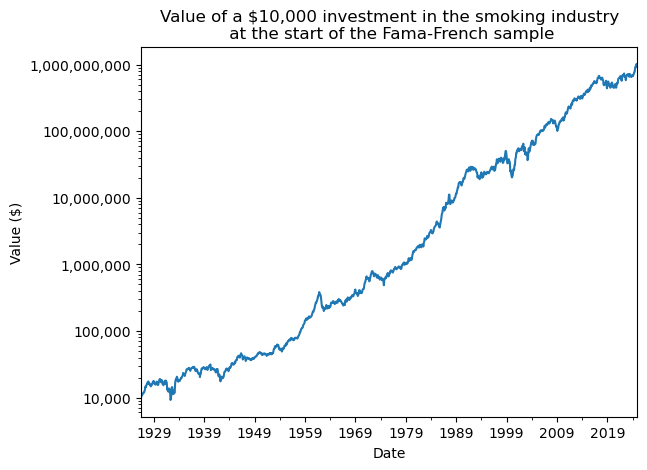

In [10]:
#| label: fig-line-plot
#| fig-cap: "This line plot shows the value of a $10,000 investment in the smoking industry at the start of the Fama-French sample"

(
    ind49
    ['Smoke']
    .add(1)
    .cumprod()
    .mul(10_000)
    .plot()
)
plt.semilogy()
plt.ylabel('Value ($)')
plt.title(f'Value of a $10,000 investment in the smoking industry\n at the start of the Fama-French sample')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

## Artificial Intelligence (AI)

You may use AI (e.g., ChatGPT) to *help* you prepare your analysis and discussion.
However:

1. AI will not do very well on this project without significant input from your team
2. AI will not be a defense against plagiarism because AI should not *write* your code and slides; If you plagiarize an AI that plagiarizes other sources, you are responsible for plagiarizing the AI and its sources

## Function to Prepare Data File

Use this function to export your data file for the competition.


In [11]:
def write_csv(portfolio_returns, group_number):
    """
    Write portfolio returns to a CSV file named Group_XX.csv with Date as YYYY-MM.
    
    Parameters:
    - portfolio_returns: pandas Series or DataFrame with monthly returns (as decimals) and Date index
    - group_number: int, your two-digit group number (e.g., 1 for Group_01)
    
    Output:
    - Saves Group_XX.csv with two columns: Date (YYYY-MM) and Group_XX (returns as decimals)
    """
    
    # Make two-digit group number
    group_str = f"{group_number:02d}"
    filename = f"Group_{group_str}.csv"
    
    # Convert returns to DataFrame if Series
    if isinstance(portfolio_returns, pd.Series):
        df = portfolio_returns.to_frame(name=f"Group_{group_str}")
    else:
        df = portfolio_returns.rename(columns={portfolio_returns.columns[0]: f"Group_{group_str}"})
    
    # Convert index to PeriodIndex with monthly frequency and format as YYYY-MM
    if isinstance(df.index, pd.PeriodIndex):
        if df.index.freq != 'M':
            df.index = df.index.to_timestamp().to_period('M')
    elif isinstance(df.index, pd.DatetimeIndex):
        df.index = df.index.to_period('M')
    else:
        raise ValueError("Index must be a datetime or PeriodIndex")
    
    # Rename index to Date
    df.index.name = "Date"
    
    # Write to CSV
    df.to_csv(filename, index=True)
    
    print(f"Saved portfolio returns to {filename}")

In [12]:
# Example usage:
dates = pd.date_range(start="1931-07-01", end="1936-06-01", freq="MS")
returns = pd.Series([0.0025, 0.01, -0.005] + [0.001] * (len(dates) - 3), index=dates)
write_csv(returns, 1)

Saved portfolio returns to Group_01.csv


In [13]:
group_01 = (
    pd.read_csv(
        filepath_or_buffer='Group_01.csv',
        parse_dates=['Date'],
        na_values=[-99.99, -999]
    )
    .assign(Date=lambda x: x['Date'].dt.to_period('M'))
    .set_index('Date')
    .rename_axis(columns=['Team'])
    .div(100)
)

In [14]:
group_01.head()

Team,Group_01
Date,
1931-07,0.000025
1931-08,0.000100
1931-09,-0.000050
1931-10,0.000010
1931-11,0.000010
